## Import Libraries Needed

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from geopy.geocoders import Nominatim
import folium
from datetime import datetime

## Convert the CSV data into a Pandas Dataframe

In [25]:
df = pd.read_csv('nypd_ShootingData.csv')
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,236168668,11/11/2021,15:04:00,BROOKLYN,79,0.0,NaN,False,NaN,NaN,NaN,18-24,M,BLACK,996313.0,187499.0,40.681318,-73.956509,POINT (-73.95650899099996 40.68131820000008)
1,231008085,07/16/2021,22:05:00,BROOKLYN,72,0.0,NaN,False,45-64,M,ASIAN / PACIFIC ISLANDER,25-44,M,ASIAN / PACIFIC ISLANDER,981845.0,171118.0,40.636364,-74.008667,POINT (-74.00866668999998 40.63636384100005)
2,230717903,07/11/2021,01:09:00,BROOKLYN,79,0.0,NaN,False,<18,M,BLACK,25-44,M,BLACK,996546.0,187436.0,40.681145,-73.955669,POINT (-73.95566903799994 40.68114495900005)
3,237712309,12/11/2021,13:42:00,BROOKLYN,81,0.0,NaN,False,NaN,NaN,NaN,25-44,M,BLACK,1001139.0,192775.0,40.695792,-73.939096,POINT (-73.939095905 40.69579171600003)
4,224465521,02/16/2021,20:00:00,QUEENS,113,0.0,NaN,False,NaN,NaN,NaN,25-44,M,BLACK,1050710.0,184826.0,40.673740,-73.760411,POINT (-73.76041066999993 40.67374017600008)


[Text(0.5, 1.0, 'Bar Chart of Count of Shooting Incidents by Borough')]

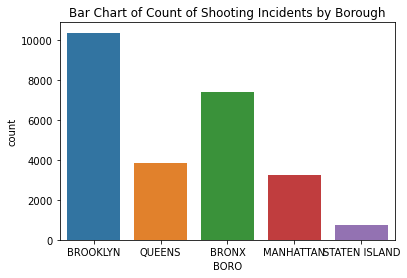

In [6]:
sns.countplot(x=df["BORO"]).set(title="Bar Chart of Count of Shooting Incidents by Borough")

## It appears that most of the Shooting Incidents in NYC are in Brooklyn

In [8]:
geolocator = Nominatim(timeout=10, user_agent="PDS")

## Map of All NYC Shooting Incidents in 2021

In [55]:
nyc_shooting_map = folium.Map(location=(40.7128, -74.0060), zoom_start=10)
for index,row in df.iterrows():
  if ("2021" in row['OCCUR_DATE']):
      folium.Marker(location=(row['Latitude'], 
                              row['Longitude']), 
                    popup=row['OCCUR_DATE'] + '\n' +
                          row['OCCUR_TIME'] + '\n' +
                          row['VIC_RACE'] + '\n' + 
                          row['BORO']).add_to(nyc_shooting_map)

display(nyc_shooting_map)

## Counts of all the races in NYC that experienced Shooting Incidents

In [7]:
df["VIC_RACE"].value_counts()

BLACK                             18281
WHITE HISPANIC                     3742
BLACK HISPANIC                     2485
WHITE                               660
ASIAN / PACIFIC ISLANDER            354
UNKNOWN                              65
AMERICAN INDIAN/ALASKAN NATIVE        9
Name: VIC_RACE, dtype: int64

In [8]:
df["VIC_RACE"].value_counts()[:5]

BLACK                       18281
WHITE HISPANIC               3742
BLACK HISPANIC               2485
WHITE                         660
ASIAN / PACIFIC ISLANDER      354
Name: VIC_RACE, dtype: int64

<AxesSubplot:>

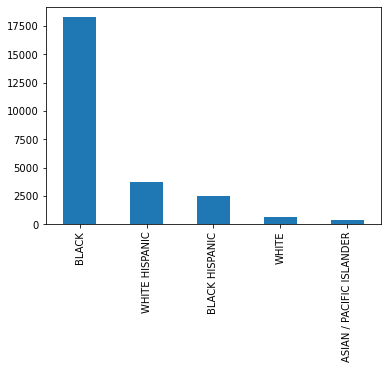

In [11]:
df["VIC_RACE"].value_counts()[:5].plot(kind='bar')

## As we can see, the most common race associated with Shooting Incidents in NYC is Black

## Now, we want to see whether there is a correlation between the black race and living in Brooklyn

<AxesSubplot:xlabel='BORO', ylabel='VIC_RACE'>

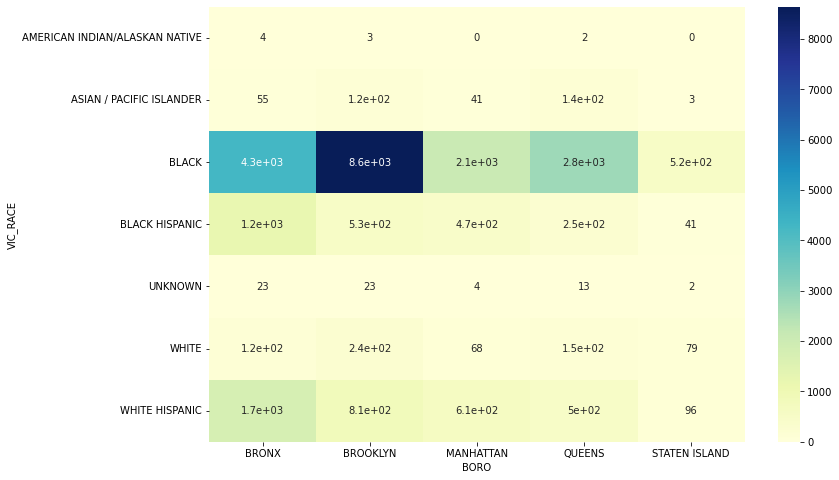

In [30]:
plt.figure(figsize=(12,8))
sns.heatmap(pd.crosstab(df["VIC_RACE"], df["BORO"]), annot=True, cmap="YlGnBu")

## This shows that our hypothesis was true, there appears to be a strong, positive association between shooting incidents involving black people and shooting incidents occurring in Brooklyn